In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from components.MiniBatchGradient import MiniBatchGradient

In [2]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.1,
    random_state=0
)

Begin training...
e0(err=54.419961813326736, acc=0.34)
e100(err=44.97675376505191, acc=0.3)
e200(err=44.884291823622895, acc=0.47)
e300(err=44.54022557278175, acc=0.69)
e400(err=41.200664753950896, acc=0.69)
e500(err=24.22012102333151, acc=0.69)
e600(err=22.028608474551213, acc=0.72)
e700(err=20.37333701126126, acc=0.81)
e800(err=18.576907280441237, acc=0.89)
e900(err=16.438557794245373, acc=0.91)
e1000(err=12.596002789556076, acc=0.96)
e1100(err=8.245196072654794, acc=0.97)
e1200(err=5.799849652481316, acc=0.98)
e1300(err=4.727120869802037, acc=0.97)
e1400(err=4.180754905999671, acc=0.97)
e1500(err=3.9464816712225734, acc=0.96)
e1600(err=3.858612437398909, acc=0.96)
e1700(err=3.8003891900496294, acc=0.96)
e1800(err=3.7430336835751734, acc=0.96)
e1900(err=3.6870419505452547, acc=0.96)
e1999(err=3.4498347180489253, acc=0.97)

Training done!!
Accuracy :  1.0
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1]

Visualisasi Error


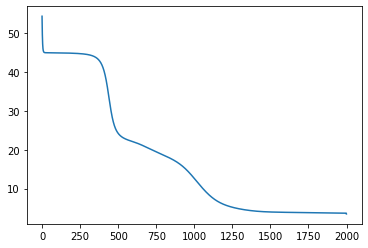

Visualisasi Akurasi


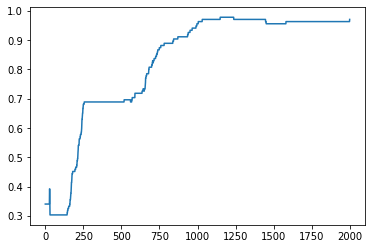

In [10]:
mbg = MiniBatchGradient([4, 5, 5, 5, 3], 32)
trainTarget = []
for target in y_train:
  if target == 0 :
    trainTarget.append([1, 0, 0])
  elif target == 1 :
    trainTarget.append([0, 1, 0])
  elif target == 2 :
    trainTarget.append([0, 0, 1])

print("Begin training...")
result = mbg.trainModel(X_train, trainTarget, 2000, 0.01, 0.01)
print("\nTraining done!!")
predictedTarget = mbg.predict(X_test)
acc = 0
for i in range(len(predictedTarget)):
  if predictedTarget[i] == y_test[i]:
    acc += 1
print("Accuracy : ", acc/len(X_test))
print(predictedTarget)
# print(X_test)

print('')
print("Visualisasi Error")
plt.plot(result["err"])
plt.show()
print("Visualisasi Akurasi")
plt.plot(result["acc"])
plt.show()


In [9]:
from sklearn.neural_network import MLPClassifier

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
dataset = df.to_numpy()

numOfInputLayer = len(dataset[0]) - 1
numOfHiddenLayer = 3
outputLayer = len(set([data[-1] for data in dataset]))

classifier = MLPClassifier(
    hidden_layer_sizes=(numOfHiddenLayer), 
    max_iter= 2000, 
    activation='logistic', 
    solver='sgd', 
    batch_size= 32, 
    learning_rate_init= 0.1,
    random_state=1
)

classifier.fit(iris.data, iris.target)
sklearnResult = classifier.predict(iris.data)

numOfCorrectTarget = 0
for i in range(len(sklearnResult)):
	if (sklearnResult[i] == iris.target[i]):
		numOfCorrectTarget += 1
 
print("Sklearn Result\n****************************************************")
print('Num of Data          : ' + str(len(dataset)))
print('Batch size           : 32')
print('Epochs               : 2000') 
print('Accuracy             : ' + str(numOfCorrectTarget/len(dataset)))

Sklearn Result
****************************************************
Num of Data          : 150
Batch size           : 32
Epochs               : 2000
Accuracy             : 0.9466666666666667
